In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Task 3_Final Content Data set.csv")
print(df.head())

   Unnamed: 0                            Content ID  ... Sentiment Score
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2  ...  negative     0
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2  ...  negative    10
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2  ...  negative    15
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2  ...  negative     0
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2  ...  positive    30

[5 rows x 8 columns]


In [36]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
# Create a dictionary to map month numbers to names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Map the month number to its name
df['Month'] = df['Month'].map(month_dict)

# Count the number of postings per month
postings_per_month = df['Month'].value_counts()

# Find the month with the highest number of postings
highest_posting_month = postings_per_month.idxmax()
print(f"The month with the highest number of postings is: {highest_posting_month}")


The month with the highest number of postings is: January


In [4]:
top_categories = df.groupby('Category')['Score'].sum().nlargest(5)
top_categories = top_categories.to_frame()

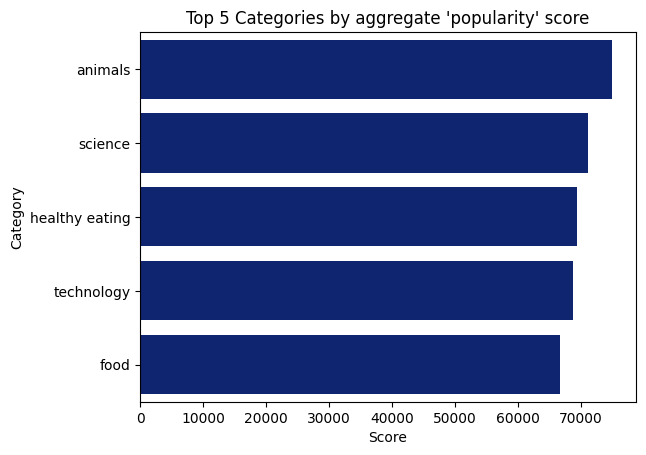

In [12]:
sns.barplot(data=top_categories, x='Score', y='Category')
plt.title("Top 5 Categories by aggregate 'popularity' score")
plt.show()

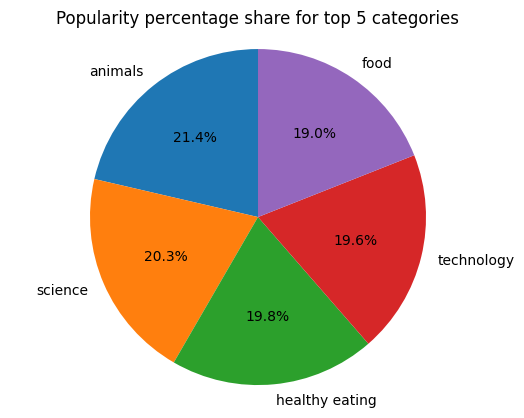

In [7]:
labels = top_categories.index
sizes = top_categories.values.flatten()  # Convert sizes into a 1D array

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Popularity percentage share for top 5 categories")
plt.show()